In [1]:
# Import the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pickle

In [2]:
# Load the dataset
df = pd.read_csv("Algerian_forest_fires_cleaned.csv")

In [3]:
# First few rows of the dataset for initial data inspection
print(df.head())

   day  month  year  Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  \
0    1      6  2012           29  57  18   0.0  65.7  3.4   7.6  1.3  3.4   
1    2      6  2012           29  61  13   1.3  64.4  4.1   7.6  1.0  3.9   
2    3      6  2012           26  82  22  13.1  47.1  2.5   7.1  0.3  2.7   
3    4      6  2012           25  89  13   2.5  28.6  1.3   6.9  0.0  1.7   
4    5      6  2012           27  77  16   0.0  64.8  3.0  14.2  1.2  3.9   

   FWI      Classes  Region  
0  0.5  not fire          0  
1  0.4  not fire          0  
2  0.1  not fire          0  
3  0.0  not fire          0  
4  0.5  not fire          0  


This dataset provides valuable information for understanding the patterns and causes of forest fires in Algeria, and can be used to predict future forest fires.

**Data Cleaning and Preprocessing - Handling Errors**

In [4]:
print(df.isnull().sum()) # Check for missing values

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64


The previous output indicates that there are no missing values in any of the columns of the dataset. Each column has 0 null values. So we don't need to handle missing values.

In [5]:
# Analyze variable distributions
df.describe() # Summary statistics of the dataset

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


The dataset contains 243 observations recorded in 2012, with multiple weather-related variables such as Temperature, Relative Humidity (RH), Wind Speed (Ws), Rain, and fire risk indices like FFMC, DMC, DC, ISI, BUI, and FWI.

The distribution of these indices suggests that dry fuel (FFMC), minimal rain (Rain), and moderate winds (Ws) are likely to drive fire danger, making these variables highly relevant for the prediction model.

The DC (Drought Code) has a high standard deviation (47.67), indicating a wide range of values across the dataset.

In [6]:
# General information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB
None


With the previous information of the data we can observe that the Classes column is not numeric type, therefore, we need to change its data type to numeric values to handle the NaN error

In [7]:
#Handling the Non-numeric error
print(df['Classes'].unique()) # Check the unique values in the Classes column before applying the mapping to ensure they match

['not fire   ' 'fire   ' 'fire' 'fire ' 'not fire' 'not fire '
 'not fire     ' 'not fire    ']


With the previous output we can see that there are blank spaces that we have to erase to effectively transform the Classes column into numeric values

In [8]:
# Remove any leading or trailing spaces in the 'Classes' column
df['Classes'] = df['Classes'].str.strip()

print(df['Classes'].unique())  # Check the updated unique values

['not fire' 'fire']


In [9]:
# Convert 'Classes' to numeric
df['Classes'] = df['Classes'].map({'fire': 1, 'not fire': 0})  # Adjust mapping as per actual values

print(df['Classes'])  # Check the updated 'Classes' column

0      0
1      0
2      0
3      0
4      0
      ..
238    1
239    0
240    0
241    0
242    0
Name: Classes, Length: 243, dtype: int64


**Exploratory Data Analysis (EDA)**

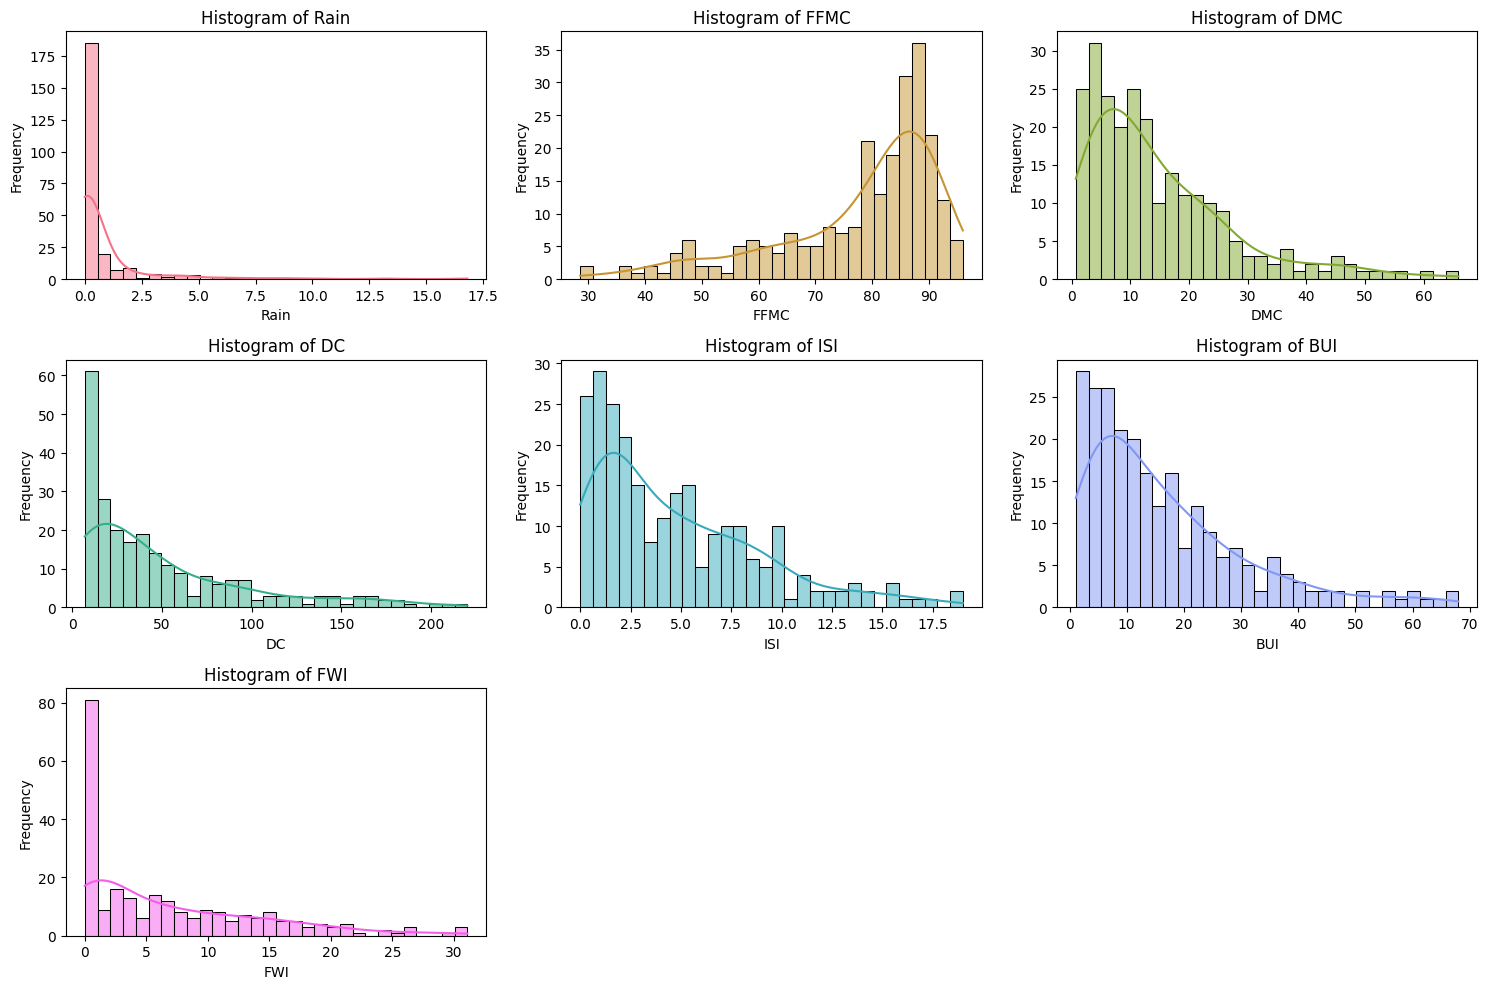

In [10]:
# Creating the histograms

# Get the float columns to visualize them
float_columns = df.select_dtypes(include=['float']).columns

# Set up the plot
num_cols = len(float_columns)
fig, axes = plt.subplots(nrows=(num_cols // 3) + 1, ncols=3, figsize=(15, (num_cols // 3) * 5))
axes = axes.flatten()  # Flatten the axes array for easy indexing

# Create histograms for each float column
colors = sns.color_palette("husl", num_cols)  # Generate a color palette

for i, column in enumerate(float_columns):
    sns.histplot(df[column], bins=30, ax=axes[i], color=colors[i], kde=True)  # kde=True adds a density plot
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Hide any empty subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

By examining the histograms, we can identify meaningful conclusions about the distributions, central tendencies, variability, outliers, and potential relationships between features. In this case, all the visualized features except for the FFMC (right skew) have a left skew distribution. Additionally, it is clear that the rain and DC features will probably have a considerable number of outliers due to their extremely right skew distribution.

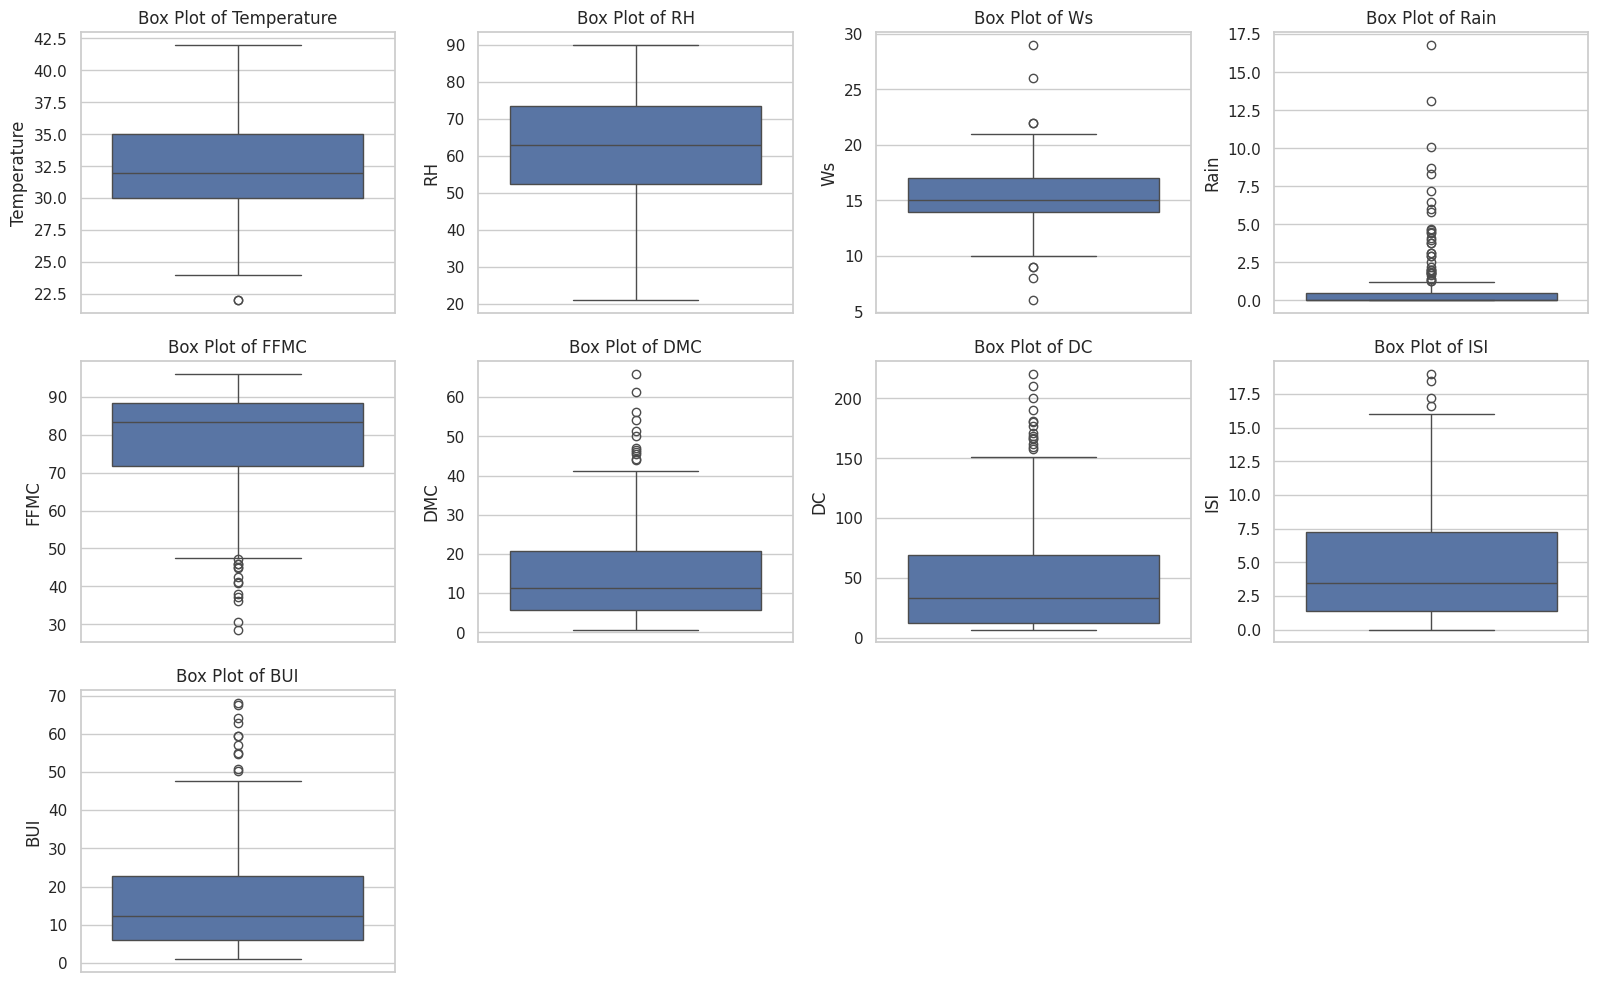

In [11]:
# Identify outliers using the boxplot method

# Set the style of seaborn for better visuals
sns.set(style="whitegrid")

# Plot boxplots for each numerical column
numerical_columns = ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI']

# Create subplots
plt.figure(figsize=(16, 10))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=df[column])
    plt.title(f'Box Plot of {column}')

plt.tight_layout()
plt.show()

In the boxplot we can see some outliers lying outside of the whiskers. We will use the interquartile range (IQR) method to remove them, so they will not affect our model.

In [12]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)

Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to exclude outliers
df_no_outliers = df[~((df[numerical_columns] < lower_bound) | (df[numerical_columns] > upper_bound)).any(axis=1)]

print(f"Original dataset size: {df.shape[0]}, New dataset size: {df_no_outliers.shape[0]}")

Original dataset size: 243, New dataset size: 177


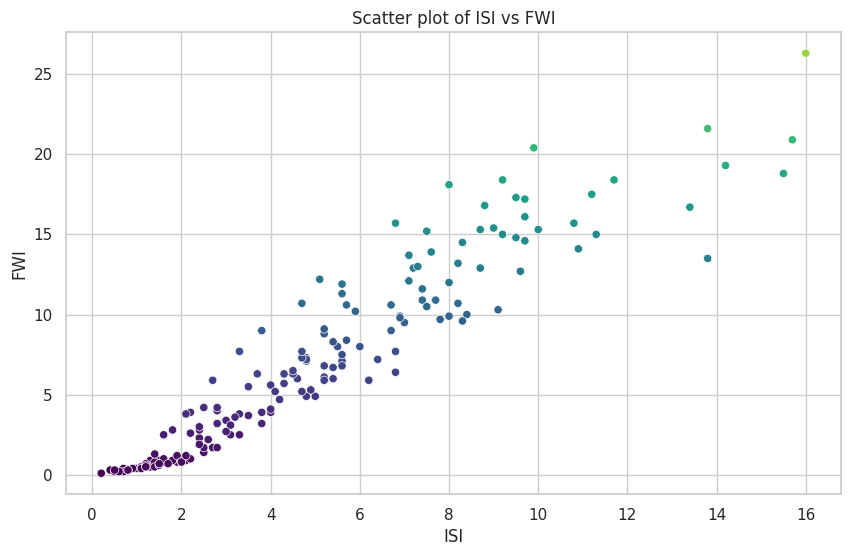

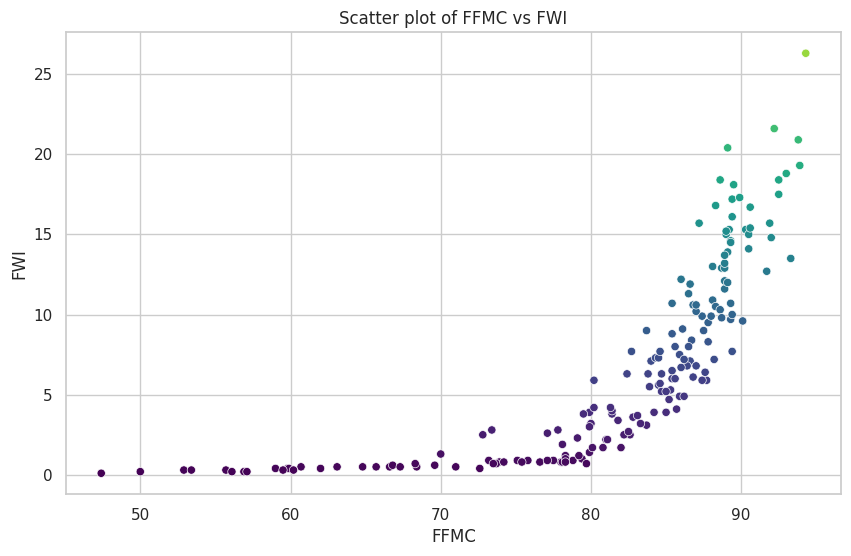

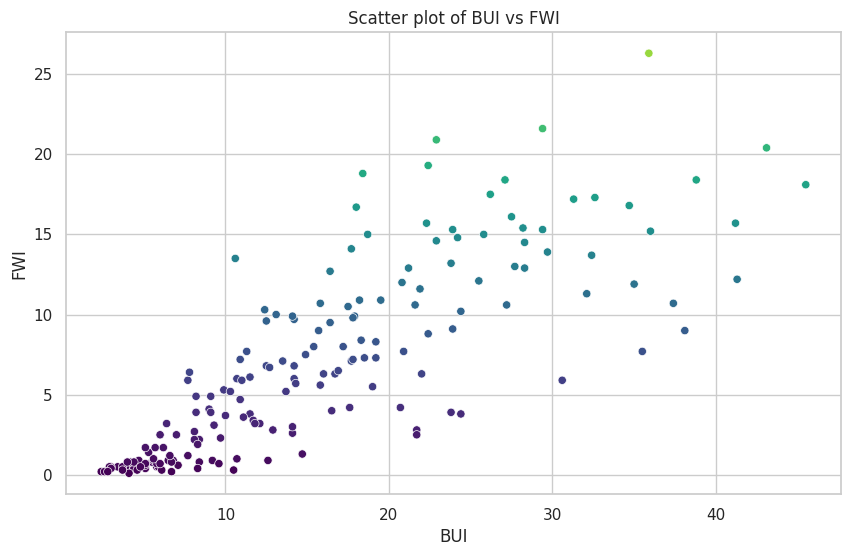

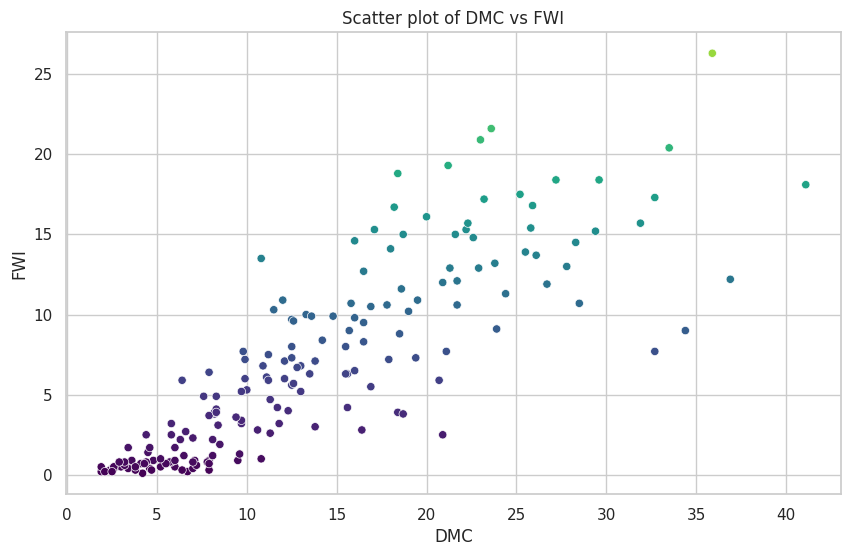

In [13]:
# Visualizing relationships with Scatter Plot

# Set the style of seaborn for better visuals
sns.set(style="whitegrid")

# Define the list of important variables
important_variables = ['ISI', 'FFMC', 'BUI', 'DMC']

# Define color palettes for the scatterplots
color_palettes = ['Blues', 'Greens', 'Reds', 'Purples', 'Oranges']

# Scatterplot with a gradient color to represent FWI
for var in ['ISI', 'FFMC', 'BUI', 'DMC']:
    plt.figure(figsize=(10, 6))

    # Scatterplot with a gradient color for FWI
    sns.scatterplot(
        x=df_no_outliers[var], y=df['FWI'], hue=df['FWI'],
        palette='viridis',  # Use a colormap for continuous values
        legend=None
    )

    plt.xlabel(var)
    plt.ylabel('FWI')
    plt.title(f'Scatter plot of {var} vs FWI')
    plt.show()

All of the variables (DMC, BUI, FFMC, and ISI) show a positive correlation with FWI, meaning that as these factors increase, the FWI also tends to increase.

DMC vs FWI: Higher DMC values, which indicate drier conditions, are associated with higher FWI, suggesting an increased fire potential.

BUI vs FWI: The positive correlation suggests that higher build-up conditions contribute to an elevated fire risk, as evidenced by the rising FWI values.

FFMC vs FWI: The positive correlation suggests that FWI is relatively unaffected until FFMC reaches a critical level where fine fuels (such as dry leaves and grasses) are dry enough to significantly influence fire risk.

ISI vs FWI: Higher ISI values, which indicate conditions that favor faster fire spread, directly correlate with higher FWI values, suggesting that when the initial spread conditions are more favorable, the fire potential is also high.

**Feature Engineering**

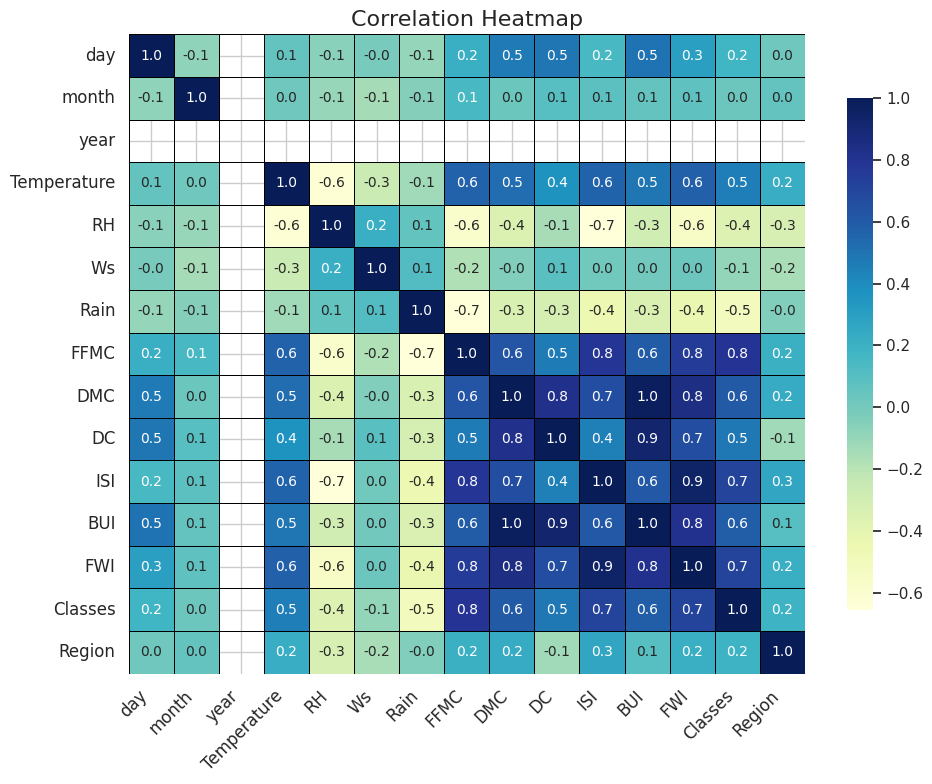

In [14]:
# Correlation matrix
corr_matrix = df_no_outliers.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".1f", cmap='YlGnBu',
            cbar_kws={"shrink": .8}, linewidths=.5, linecolor='black',
            annot_kws={"size": 10})

# Title and labels
plt.title('Correlation Heatmap', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

Correlation with FWI:

DMC (Duff Moisture Code): High positive correlation with FWI (~0.8). This suggests that DMC is a strong predictor of FWI.

BUI (Build Up Index): Strong positive correlation with FWI (~0.8). BUI appears to be a highly relevant feature.

ISI (Initial Spread Index): Also has a high positive correlation with FWI (~0.9), indicating it is an important factor.

FFMC (Fine Fuel Moisture Code): Positive correlation (~0.8) with FWI, indicating its relevance.

DC (Drought Code): Moderate positive correlation (~0.7) with FWI, which could make it a useful feature in the model.

Classes (Drought Code): Moderate positive correlation (~0.7) with FWI, which could make it a useful feature in the model.


Features with Lower Correlation:

Temperature: Shows a moderate positive correlation (~0.6) with FWI, suggesting that it may contribute to predicting FWI, but it is not as influential as other factors.

RH (Relative Humidity) shows a moderate negative correlation (~ -0.6) with FWI, which indicates it might be important to include in our model.

Ws (Wind Speed): Show low correlations with FWI (0.0). These features may not be as impactful individually, but they could still add some value when considered in combination with other features.

Region:

Region do not show a significant correlation with FWI (around 0.2), indicating that they may not be very useful for predicting FWI.


In [15]:
# Set the threshold for correlation
corr_threshold = 0.22

# Identify features with correlation above the threshold
relevant_features = corr_matrix['FWI'][abs(corr_matrix['FWI']) > corr_threshold].index.tolist()

# Remove the target variable from the list of features
relevant_features.remove('FWI')

print("Relevant Features:", relevant_features)

Relevant Features: ['day', 'Temperature', 'RH', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'Classes']


In [16]:
# Separate the features (X) and the target variable (Y)

# Define the feature matrix (X) and target vector (Y)
X = df_no_outliers[relevant_features]  # Features excluding irrelevant columns
Y = df_no_outliers['FWI']  # Target variable

In [17]:
print(X.shape)  # Should be (n_samples, n_features)
print(Y.shape)  # Should be (n_samples,)

(177, 10)
(177,)


If the above shapes are incorrect, it can lead to errors or unexpected results during training or prediction. In this case the data is already in the correct format and dimensions

**MODEL BUILDING**

**Multiple Linear Regression**

In [18]:
# Let's apply multiple linear regression to predict the target Classes

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [19]:
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply linear regression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)

# Evaluate performance
lr_mse = mean_squared_error(y_test, lr_pred)
lr_rmse = np.sqrt(lr_mse)
lr_mae = mean_absolute_error(y_test, lr_pred)
lr_r2 = r2_score(y_test, lr_pred)
print("Multiple Linear Regression:")
print("MSE:", lr_mse)
print("RMSE:", lr_rmse)
print("MAE:", lr_mae)
print("R2:", lr_r2)

Multiple Linear Regression:
MSE: 0.2725687405149208
RMSE: 0.5220811627658297
MAE: 0.35455690829998676
R2: 0.9919359888738654


Based on the metrics:

**Mean Squared Error (MSE): 0.27**

In this case, the MSE value is relatively low, which suggests that the model is performing well in minimizing the prediction errors.

**Root Mean Squared Error (RMSE): 0.52**

Here, the RMSE value is also quite low, indicating that the model's predictions are generally close to the actual values.

**Mean Absolute Error (MAE): 0.35**

In this case, a low MAE indicates that the model has small prediction errors on average, which is a positive indicator of performance.

**R-squared (R²): 0.99**

An R² value of 0.9919 means that approximately 99.2% of the variance in the target variable is explained by the model's features, which indicates an excellent fit. However, an R² value this high can sometimes be a sign of overfitting.

**Polynomial Regression**

In [20]:
poly_features = PolynomialFeatures(degree=2)
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.transform(X_test)
poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)
poly_pred = poly_model.predict(X_poly_test)

# Evaluate performance
poly_mse = mean_squared_error(y_test, poly_pred)
poly_rmse = np.sqrt(poly_mse)
poly_mae = mean_absolute_error(y_test, poly_pred)
poly_r2 = r2_score(y_test, poly_pred)
print("Polynomial Regression:")
print("MSE:", poly_mse)
print("RMSE:", poly_rmse)
print("MAE:", poly_mse)
print("R2:", poly_r2)

Polynomial Regression:
MSE: 0.2653317559503228
RMSE: 0.5151036361260934
MAE: 0.2653317559503228
R2: 0.9921500967863807


Polynomial Regression Metrics:

Mean Squared Error (MSE):

The MSE for the polynomial regression model is slightly lower than that of the linear regression models.
This indicates that the polynomial model is making fewer errors, on average, compared to the linear models, and may capture non-linear relationships better.

Root Mean Squared Error (RMSE):

The RMSE of the polynomial model is also slightly lower than that of the linear regression models.
This shows that the average prediction error is lower in the polynomial regression model compared to linear regression, indicating improved accuracy.

Mean Absolute Error (MAE):

The MAE for the polynomial model is significantly lower than that of the linear models.
A lower MAE suggests that, on average, the absolute prediction error for the polynomial regression model is smaller, implying better model performance and more accurate predictions.

R-squared (R²):

The R² value for the polynomial model is slightly higher than for the linear models.
The increase in R² indicates that the polynomial model explains a bit more of the variance in the target variable compared to the linear models. However, the difference is relatively small.

**Regularization Models (Ridge and Lasso)**

In [21]:
# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
ridge_pred = ridge_model.predict(X_test)

# Evaluate performance
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_rmse = np.sqrt(ridge_mse)
ridge_mae = mean_absolute_error(y_test, ridge_pred)
ridge_r2 = r2_score(y_test, ridge_pred)
print("Ridge Regression:")
print("MSE:", ridge_mse)
print("RMSE:", ridge_rmse)
print("MAE:", ridge_mae)
print("R2:", ridge_r2)

Ridge Regression:
MSE: 0.2740311391407463
RMSE: 0.5234798364223271
MAE: 0.35287468985827175
R2: 0.9918927234621119


Comparison and Insights:

The metrics (MSE, RMSE, MAE, and R²) for Ridge regression are very similar to those for the linear regression models. The introduction of regularization did not drastically change the metrics, which implies that the original model was already performing well, but it may have been overfitting.
**The slight decrease in R² and the small increase in MSE and RMSE indicate that Ridge regression is adding some level of bias to reduce variance, thus controlling overfitting.**

In [22]:
# Lasso Regression

lasso_model = Lasso(alpha=1)
lasso_model.fit(X_train, y_train)
lasso_pred = lasso_model.predict(X_test)

# Evaluate performance
lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_rmse = np.sqrt(lasso_mse)
lasso_mae = mean_absolute_error(y_test, lasso_pred)
lasso_r2 = r2_score(y_test, lasso_pred)
print("Lasso Regression:")
print("MSE:", lasso_mse)
print("RMSE:", lasso_rmse)
print("MAE:", lasso_mae)
print("R2:", lasso_r2)

Lasso Regression:
MSE: 0.6228958273200617
RMSE: 0.7892374974113062
MAE: 0.5475713969296288
R2: 0.9815714785472369


Lasso Regularization Impact:

Lasso regression's metrics show that it performed worse compared to the other models in terms of MSE, RMSE, MAE, and R². This indicates that the Lasso model has oversimplified the regression by penalizing too many coefficients and possibly removing important features.
The regularization strength (α=1.0) used by Lasso might have been too high for this particular dataset, leading to a weaker model fit.

Comparison with Other Models:

Linear and Ridge Regression: Lasso regression underperformed compared to both linear and Ridge regression models, suggesting that the features penalized to zero by Lasso were indeed important for accurately predicting the target variable.

Polynomial Regression: Polynomial regression had the best metrics, indicating that adding non-linear relationships (degree 2) allowed the model to capture more complexity, resulting in a better fit.
Feature Selection Trade-off:

Lasso regression is typically used for feature selection by reducing the number of coefficients to zero, which can help improve model interpretability. However, in this case, the penalty appears to have gone too far, resulting in a significant drop in performance.
A lower R² and higher MSE/RMSE/MAE indicate that some key features may have been removed, leading to underfitting.

**Cross-Validation and Hyperparameter Tuning**

In [23]:
# Cross-validation for Ridge Regression
ridge_cv_scores = cross_val_score(ridge_model, X, Y, cv=5, scoring='neg_mean_squared_error')

# Evaluate performance
ridge_mse = -ridge_cv_scores.mean()
print(f'Ridge CV MSE: {ridge_mse}')
ridge_rmse = np.sqrt(ridge_mse)
print(f'Ridge CV RMSE: {ridge_rmse}')
y_pred = ridge_model.predict(X)  # Make predictions on the entire data
ridge_mae = mean_squared_error(Y, y_pred)  # Calculate MAE
ridge_r2 = r2_score(Y, y_pred)  # Calculate R²
print(f'Ridge CV MAE: {ridge_mae}')
print(f'Ridge CV R2: {ridge_r2}')

# Hyperparameter tuning for Ridge
parameters = {'alpha': [0.1, 1.0, 10.0]}
ridge_cv = GridSearchCV(Ridge(), parameters, cv=5)
ridge_cv.fit(X_train, y_train)

print(f'Best Ridge Alpha: {ridge_cv.best_params_}')

Ridge CV MSE: 0.45854179345498897
Ridge CV RMSE: 0.677157140887541
Ridge CV MAE: 0.34082555313832463
Ridge CV R2: 0.9901732769476962
Best Ridge Alpha: {'alpha': 10.0}


Ridge Regression Cross-Validation:

Cross-validation gives a more reliable estimate of model performance since it tests the model on multiple different splits of the data, mitigating the risks of overfitting and providing a more robust evaluation.
The metrics (MSE, RMSE, and R²) after cross-validation show that Ridge regression with α=10.0 is performing similarly to the linear models but with slightly increased bias due to regularization.

Overall, Ridge regression with cross-validation and α=10.0 provides a model that is both stable and has good generalizability. It manages to avoid the high variance seen in polynomial regression and the overly aggressive feature elimination of Lasso.

**Save Model with Pickle**

In [24]:
# Save the best Ridge model
with open('ridge_model.pkl', 'wb') as f:
    pickle.dump(ridge_cv, f)

**Testing the Model on Unseen Data**

In [25]:
# Load dataset (assuming df_no_outliers is already loaded and cleaned)
np.random.seed(42)

# Number of synthetic data points to generate
n_samples = 100

# Create synthetic dataset by adding noise to existing data
synthetic_data = df_no_outliers.sample(n=n_samples, replace=True).copy()

# Add small Gaussian noise to each numeric column
for column in synthetic_data.select_dtypes(include=np.number).columns:
    noise = np.random.normal(loc=0, scale=synthetic_data[column].std() * 0.05, size=n_samples)
    synthetic_data[column] += noise

# Clip values to keep them within the original data range
for column in synthetic_data.columns:
    min_val = df_no_outliers[column].min()
    max_val = df_no_outliers[column].max()
    synthetic_data[column] = synthetic_data[column].clip(min_val, max_val)

# Display the generated synthetic data
print(synthetic_data)

           day     month    year  Temperature         RH         Ws      Rain  \
133  11.650754  6.107635  2012.0    26.997226  57.935489  16.944286  0.000200   
118  26.871319  9.000000  2012.0    30.956740  65.376027  10.950576  0.000000   
20   21.137858  6.000000  2012.0    30.048364  77.666298  14.045070  0.002845   
141  20.405980  6.037876  2012.0    30.876028  71.278001  13.951898  0.197926   
79   18.800588  7.943772  2012.0    35.077832  63.184202  19.033110  0.000000   
..         ...       ...     ...          ...        ...        ...       ...   
183   2.144177  8.052951  2012.0    40.000000  33.906168  14.128722  0.000000   
100   8.717003  9.000000  2012.0    29.852275  77.703859  14.969277  0.985983   
180  30.096654  7.059562  2012.0    36.075539  56.153348  15.873567  0.015134   
224  12.121964  8.912349  2012.0    30.920533  72.203484  14.294034  0.000000   
224  11.702718  8.972065  2012.0    30.881177  71.751749  14.006766  0.037810   

          FFMC        DMC  

In [26]:
X_unseen = synthetic_data[relevant_features]  # Features excluding irrelevant columns
Y_actual = synthetic_data['FWI']                   # Actual target variable

In [27]:
import joblib

# Load the model (make sure the path is correct)
model = joblib.load('ridge_model.pkl')

# Make predictions on the unseen data
Y_pred = model.predict(X_unseen)

# Display predictions
print("Predictions:", Y_pred)

Predictions: [12.49835885  4.48008047  2.58158451 -0.20454316 16.24208305 14.08298815
 12.61531423  4.55907283 19.39756694  8.0301131   6.92991904  2.09853174
  0.4193167  13.30653656  4.43613417  9.74208128 15.11696257 -0.14502007
  8.06405249  3.07165396  0.31526115 16.36821851 14.62349159  0.059643
  6.02433654 13.37080795  2.90675213 14.7142571   6.70878087  5.44016026
  2.4152363   6.50752019 12.18944897  4.87958292  0.33466856 11.53892503
  4.46752627 12.2575053  10.79019965 14.4202027  16.10350254 19.17777524
  7.61932207  1.78267932  3.0796951   7.17729248  0.846272    7.18185153
  1.11718753 14.92594153 16.47413518  5.94741905  1.007673    6.13177645
 13.11996294  5.54423761  6.54868321  1.4972032  -0.38560884 11.25070033
 11.94666504  0.40744903  1.50976822  0.59686848  9.06159654  0.70909319
  0.19234636  7.07962435  0.80594116 15.1473727   8.7553759   1.02856999
  0.54178865 -0.15171307 14.99516153  2.2952257   3.89713222  0.29898353
  5.348211   15.50973582 12.76297861  7.

In [28]:
# Evaluate the model on unseen data:
mse = mean_squared_error(Y_actual, Y_pred)
rmse = np.sqrt(mse)  # Calculate RMSE from MSE
mae = mean_absolute_error(Y_actual, Y_pred)
r2 = r2_score(Y_actual, Y_pred)

# Print the results
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²): {r2:.4f}")

Mean Squared Error (MSE): 0.5942
Root Mean Squared Error (RMSE): 0.7708
Mean Absolute Error (MAE): 0.5789
R-squared (R²): 0.9820


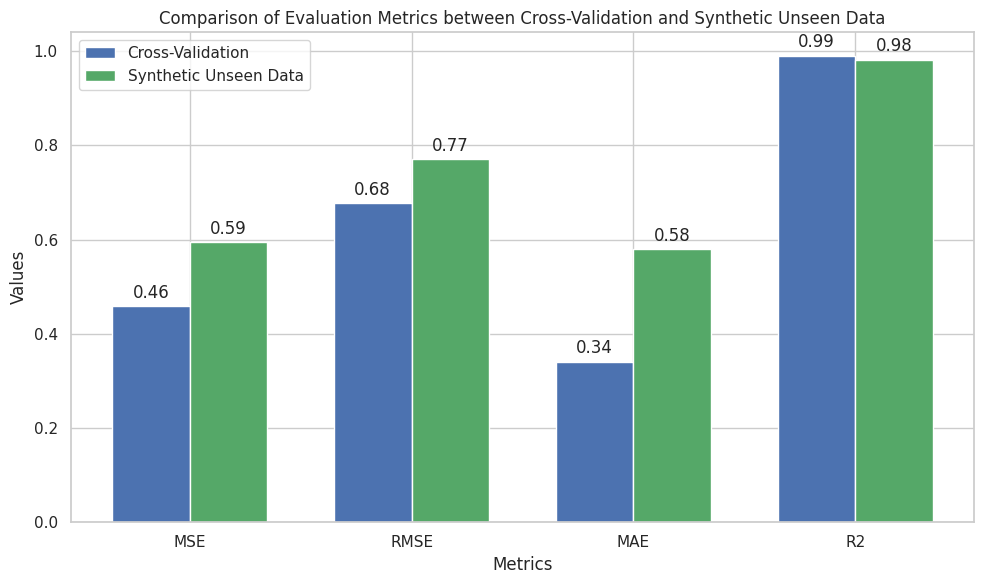

In [29]:
# Metrics from Cross-Validation
cv_metrics = {
    'MSE': 0.4585,
    'RMSE': 0.6772,
    'MAE': 0.3408,
    'R2': 0.9902
}

# Metrics from Synthetic Unseen Data
synthetic_metrics = {
    'MSE': 0.5942,
    'RMSE': 0.7708,
    'MAE': 0.5789,
    'R2': 0.9820
}

# Create labels and data for comparison
labels = list(cv_metrics.keys())
cv_values = list(cv_metrics.values())
synthetic_values = list(synthetic_metrics.values())

# Set up bar width and positions
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

# Create the bar charts
fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, cv_values, width, label='Cross-Validation', color='b')
rects2 = ax.bar(x + width/2, synthetic_values, width, label='Synthetic Unseen Data', color='g')

# Add labels, title, and legend
ax.set_xlabel('Metrics')
ax.set_ylabel('Values')
ax.set_title('Comparison of Evaluation Metrics between Cross-Validation and Synthetic Unseen Data')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Add value labels to bars
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(rects1)
add_labels(rects2)

# Show plot
plt.tight_layout()
plt.show()

**Insights from Metrics:**

**Mean Squared Error (MSE):**

Cross-Validation MSE (0.4585) was significantly lower compared to the MSE on synthetic unseen data (0.5942).
This increase suggests that the Ridge model is experiencing more variability in the predictions when tested on the synthetic data, likely because the unseen data introduces more diversity than was present in the original training data. This is natural, as cross-validation splits still have similar data distribution compared to the synthetic unseen data.

**Root Mean Squared Error (RMSE):**

RMSE during Cross-Validation was 0.6772, while RMSE on synthetic data was 0.7708.
Again, the RMSE increased on the unseen synthetic data, indicating that the model has a slightly higher average error on new data that has been artificially generated. This suggests that the model might still be sensitive to new data that deviates from the training distribution, despite using a regularized Ridge regression model.

**Mean Absolute Error (MAE):**

Cross-Validation MAE was 0.3408, while MAE on synthetic data increased to 0.5789.
The MAE increase is notable, showing that the absolute prediction error is larger on the synthetic data. This points to the need for potentially more complex models or additional data preprocessing to make the model more robust to diverse inputs.

**R-squared (R²):**

R² during Cross-Validation was 0.9909, compared to an R² of 0.9820 on synthetic data.
While the R² value is still very high, it has decreased from 0.9909 to 0.9820, which implies that the model explains slightly less variance in the synthetic data compared to during cross-validation.
This decrease indicates that while the model performed well on training splits (cross-validation), it was not able to fully capture the patterns in the synthetic unseen data. This points to the model being potentially overfitted to the training distribution.

**Conclusion:**

The Ridge model with cross-validation showed strong performance on data similar to what it trained on, but the decrease in performance when evaluated on synthetic unseen data suggests that the model may be overfitting slightly to the original data distribution, however, **the model continues to perform very well, showing relatively low error and explaining most of the variance with its high R².**

https://github.com/JuanSCampos/Neural-Networks-and-Deep-Learning_Assignment-1_Juan-Campos.git